In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path_to_csv = "kdd.txt"

df = pd.read_csv(path_to_csv, header = None)

# 1. Clean data with Panda

In [3]:
df.rename(columns={0: 'duration', 
                   1: 'protocol_type',
                   2: 'service', 
                   3: 'flag',
                   4: 'src_bytes',
                   5: 'dst_bytes',
                   6: 'land',
                   7: 'wrong_fragment',
                   8: 'urgent',
                   9: 'hot',
                   10: 'num_failed_logins',
                   11: 'logged_in',
                   12: 'num_compromised',
                   13: 'root_shell',
                   14: 'su_attempted',
                   15: 'num_root',
                   16: 'num_file_creations',
                   17: 'num_shells',
                   18: 'num_access_files',
                   19: 'num_outbound_cmds',
                   20: 'is_host_login',
                   21: 'is_guest_login',
                   22: 'count',
                   23: 'srv_count',
                   24: 'serror_rate',
                   25: 'srv_serror_rate',
                   26: 'rerror_rate',
                   27: 'srv_rerror_rate',
                   28: 'same_srv_rate',
                   29: 'diff_srv_rate',
                   30: 'srv_diff_host_rate',
                   31: 'dst_host_count',
                   32: 'dst_host_srv_count',
                   33: 'dst_host_same_srv_rate',
                   34: 'dst_host_diff_srv_rate',
                   35: 'dst_host_same_src_port_rate',
                   36: 'dst_host_srv_diff_host_rate',
                   37: 'dst_host_serror_rate',
                   38: 'dst_host_srv_serror_rate',
                   39: 'dst_host_rerror_rate',
                   40: 'dst_host_srv_rerror_rate',
                   41: 'type'
                  }, inplace=True)

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal.


In [5]:
group_by = df.groupby(['type']).size().reset_index(name='counts')

In [6]:
n_groups = df['type'].nunique()

In [26]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# 2. Visualize data with Matplotlib

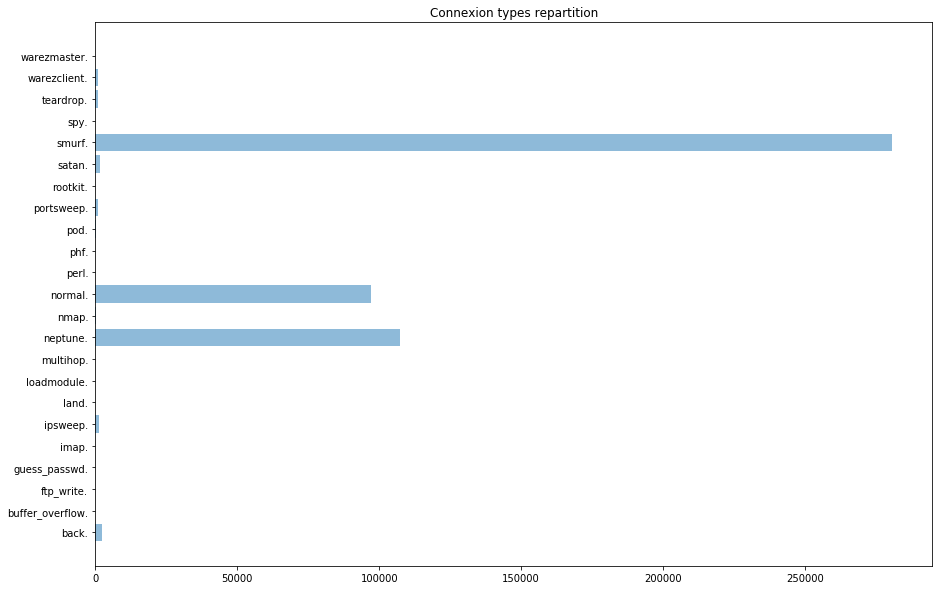

In [7]:
types = group_by['type']
count_by_type = group_by['counts']

y_pos = np.arange(len(types))

plt.figure(figsize=(15,10))
    
plt.barh(y_pos, count_by_type, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.title('Connexion types repartition')
 
plt.show()

# 3. Modelisation

Verification qu'il n'y a aucune valeur null ou na

In [8]:
NULL = df.isnull().sum()
NA = df.isna().sum()
NA_NULL = pd.DataFrame([NA, NULL]).T
NA_NULL.columns = ["nb_NA", "nb_NULL"]
NA_NULL

,nb_NA,nb_NULL
duration,0,0
protocol_type,0,0
service,0,0
flag,0,0
src_bytes,0,0
dst_bytes,0,0
land,0,0
wrong_fragment,0,0
urgent,0,0
hot,0,0


In [39]:
#Ce avec quoi on va predire
X = df.loc[:, df.columns != "type"]
X = X.drop("protocol_type", 1)
X = X.drop("service", 1)
X = X.drop("flag", 1)
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [40]:
#Ce que l'on veut predire
Y = df["type"]
Y.head()

0    normal.
1    normal.
2    normal.
3    normal.
4    normal.
Name: type, dtype: object

In [41]:
#Séparation en jeu de test et de train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
hyperparametres = {"n_estimators" : 20, 
                  "bootstrap" : False}
#On fait un dictionnaire avec les hypers paramètres

In [44]:
algo = RandomForestClassifier(**hyperparametres)

In [45]:
#Entrainement du modèle
modele = algo.fit(X_train, Y_train)

In [46]:
modele.score(X_test, Y_test)

0.9998110763251646

In [47]:
from sklearn.svm import SVC

In [48]:
algo2 = SVC()

In [ ]:
modele2 = algo2.fit(X_train, Y_train)

In [ ]:
modele2.score(X_test, Y_test)